In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Plot examples

In [13]:
from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.particles import particle_paths
import matplotlib

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (12,10)

from h5py import File
import os

In [14]:
# Open a file, fine the particle paths from the root attributes
# Pick one:
H5FILE = 'data/bmad_particles2.h5'
#H5FILE = 'data/distgen_particles.h5'
#H5FILE = 'data/astra_particles.h5'

# Load
h5 = File(H5FILE)
ppaths = particle_paths(h5)
ph5 = h5[ppaths[0]]

P = ParticleGroup(ph5)
str(P)

'ParticleGroup with 100000 particles with total charge 2.499999999999999e-10 C'

# Slice statistics

In [15]:
from pmd_beamphysics.plot import slice_plot

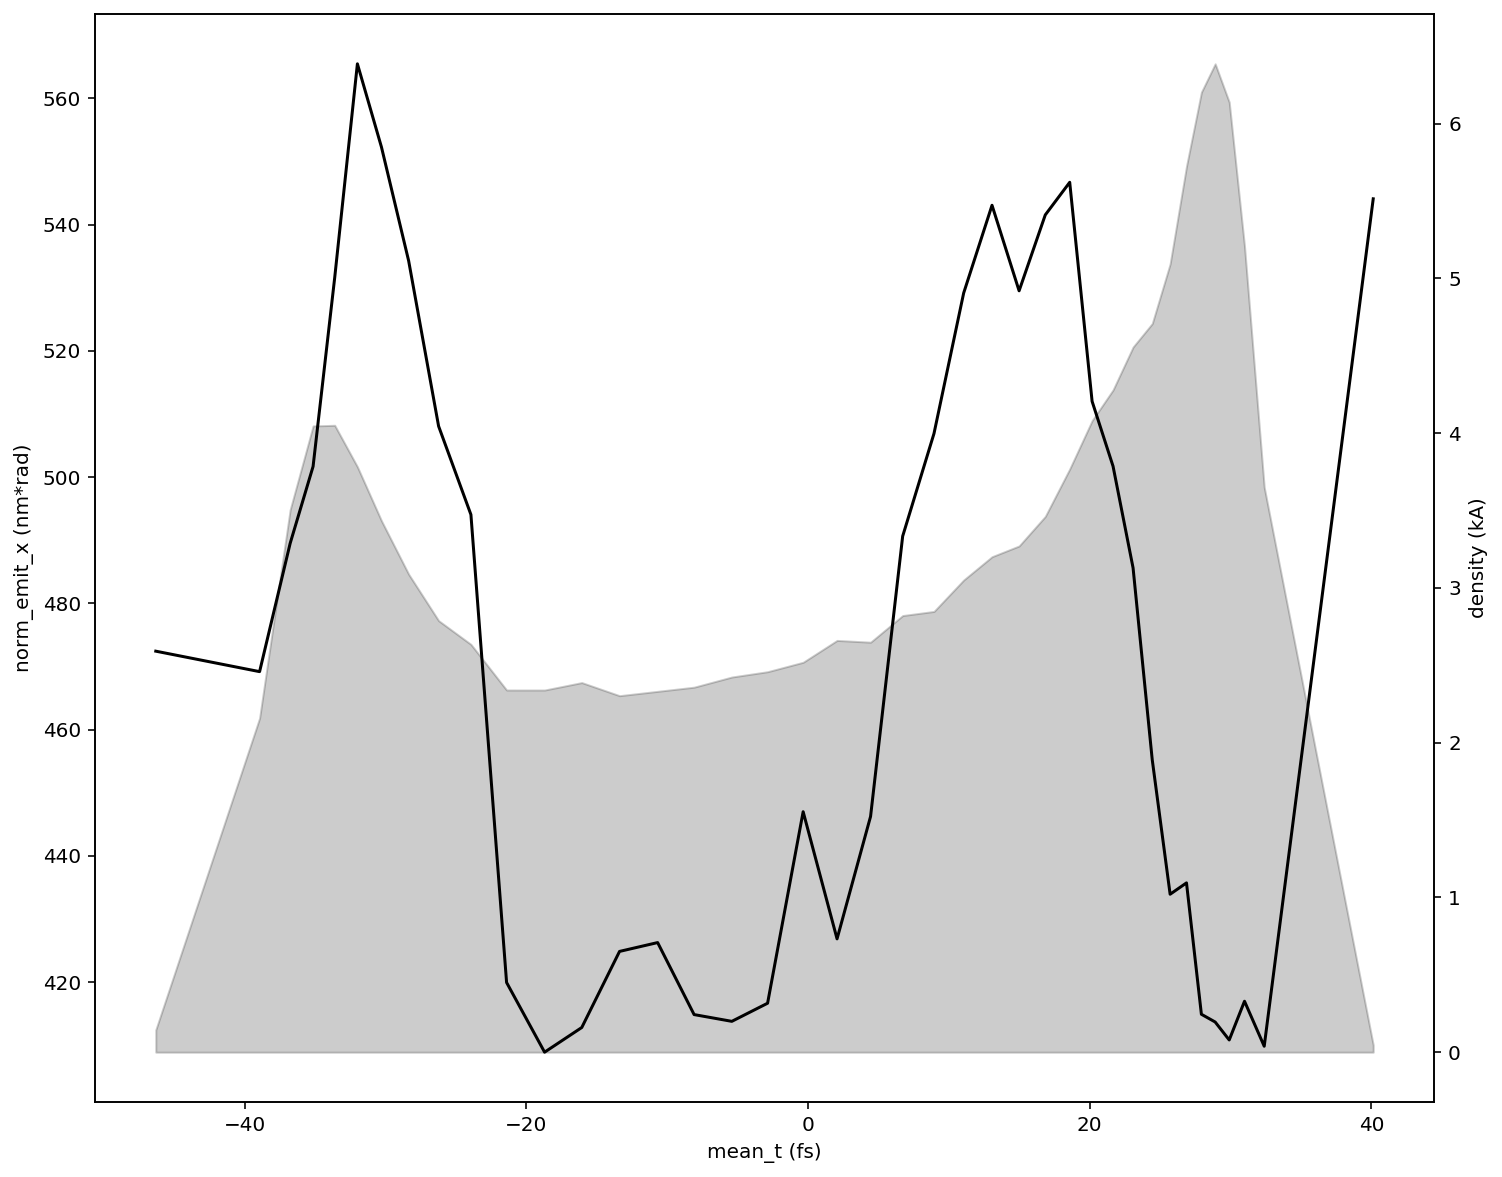

In [16]:

P.t = P.t - P['mean_t']
slice_plot(P, 'norm_emit_x', slice_key='t')

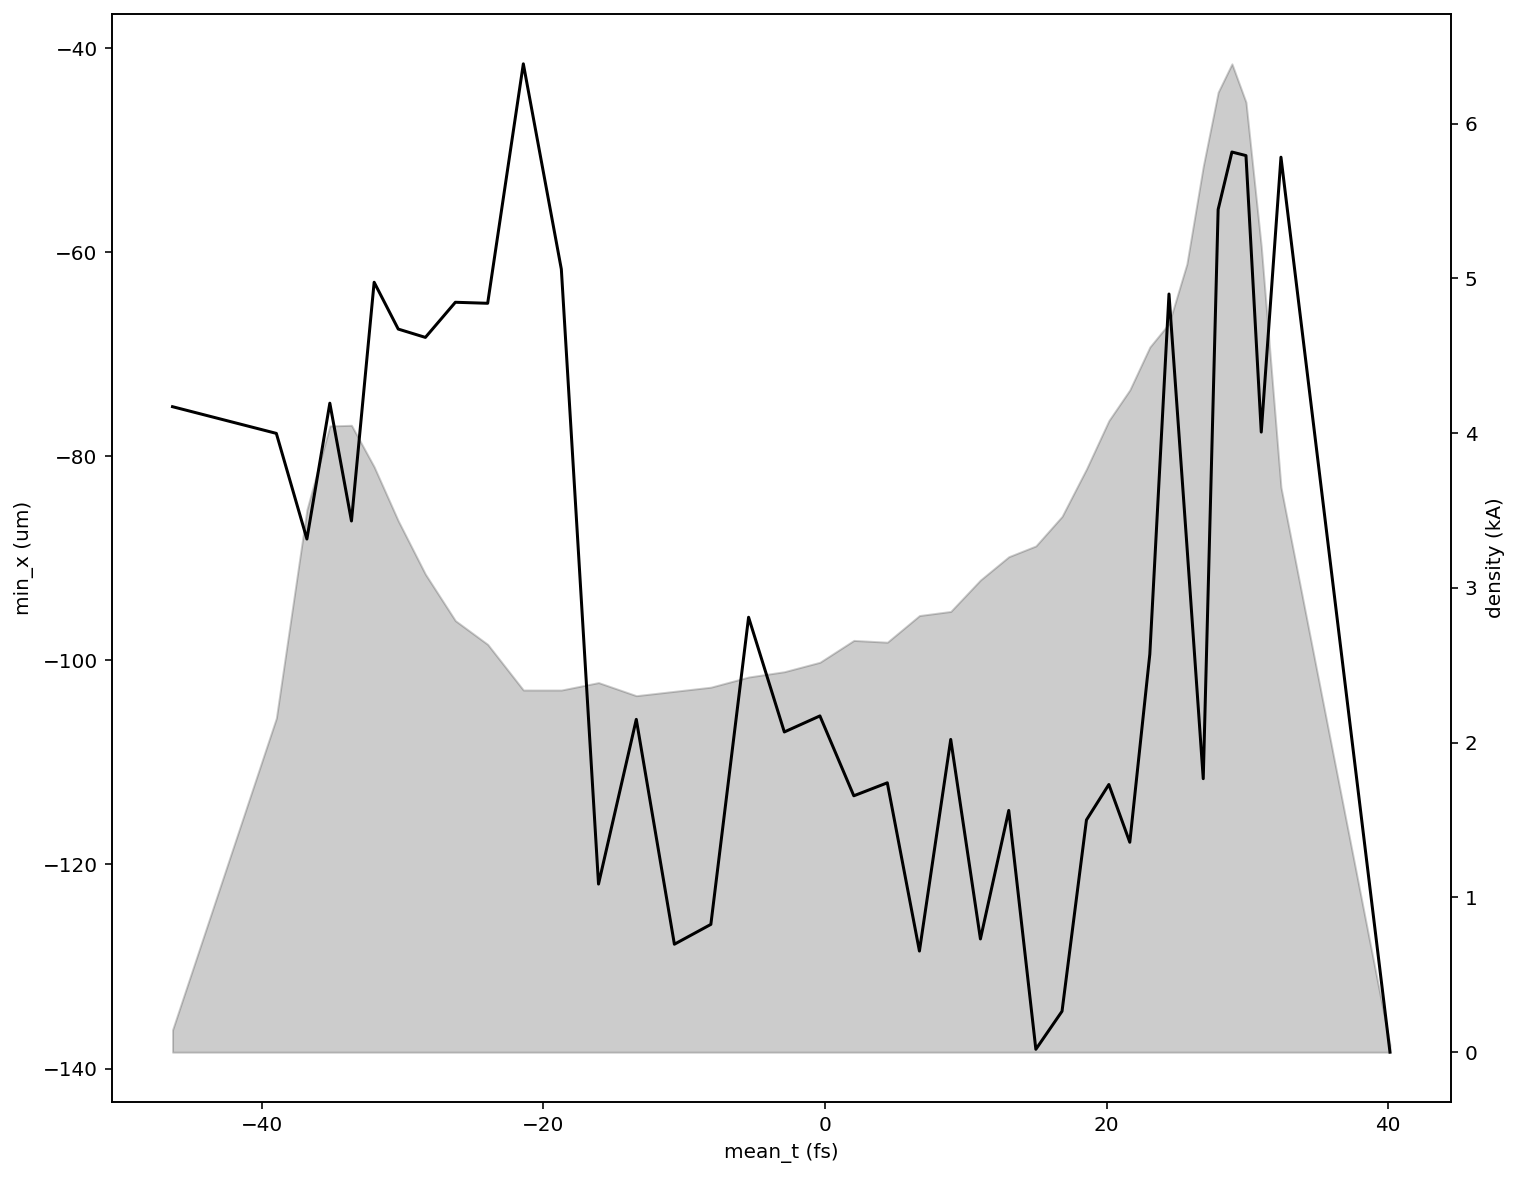

In [17]:
slice_plot(P, 'min_x', slice_key='t')

# Density plots

In [18]:
from pmd_beamphysics.plot import marginal_plot

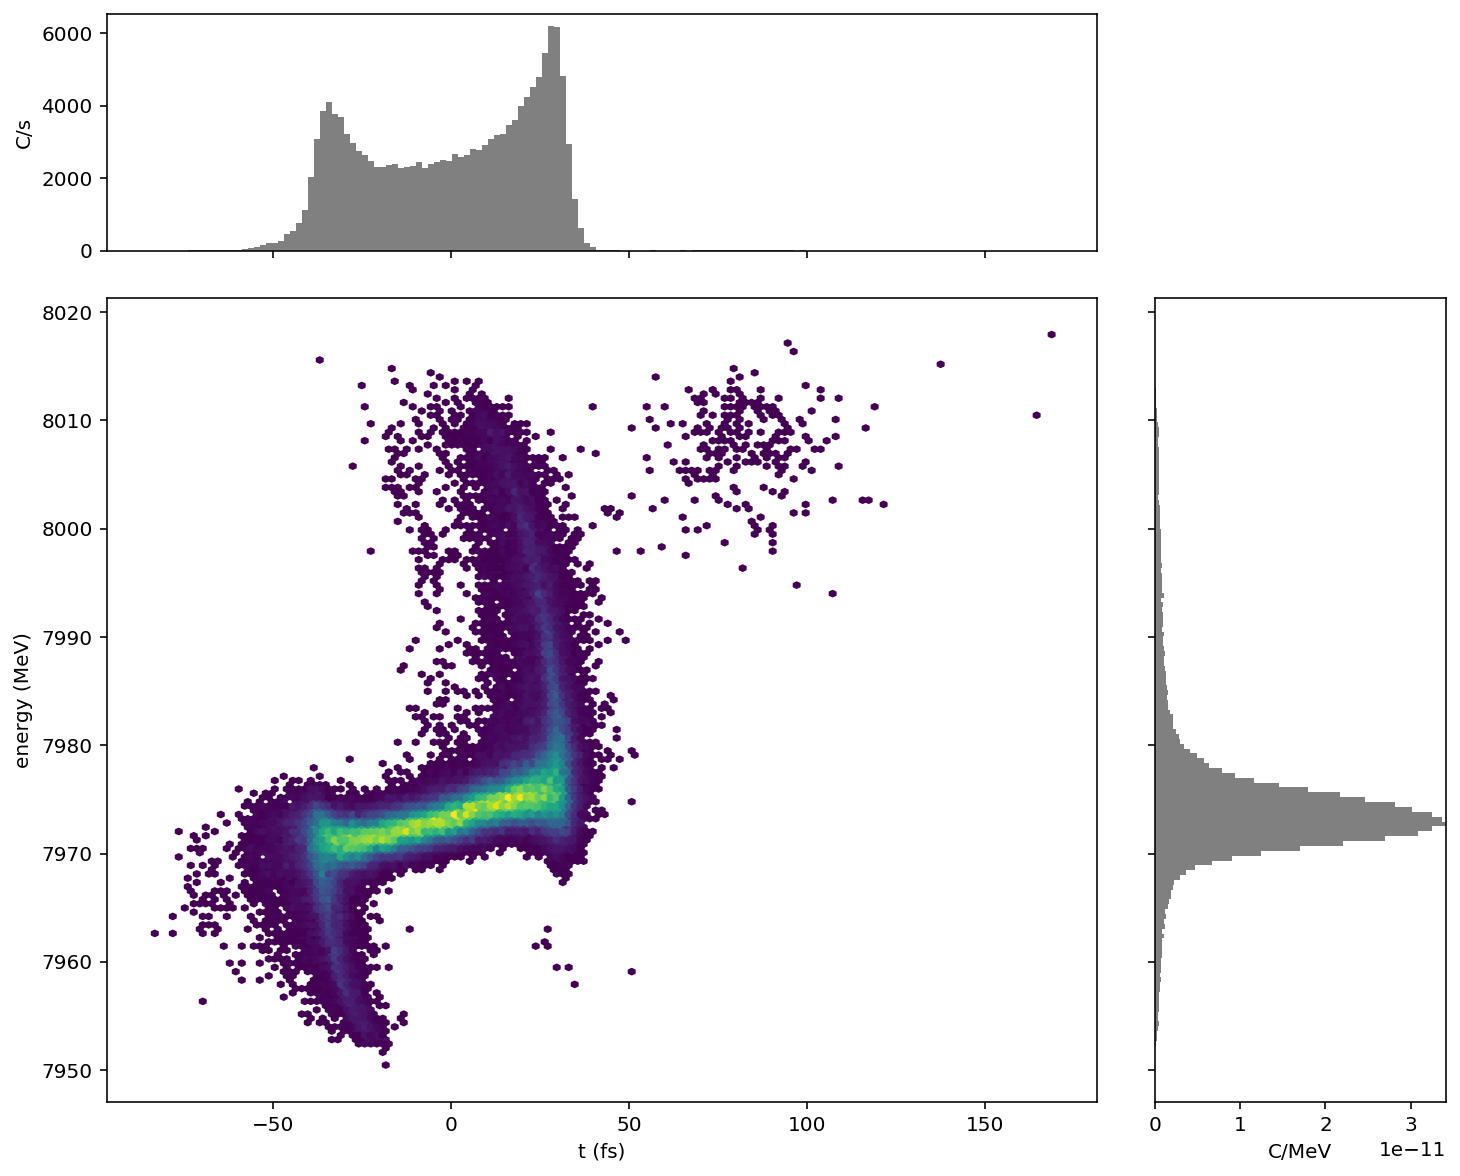

In [19]:

marginal_plot(P, 't', 'energy', bins=150)

# Combined density and slice plot

In [20]:
from pmd_beamphysics.plot import density_and_slice_plot

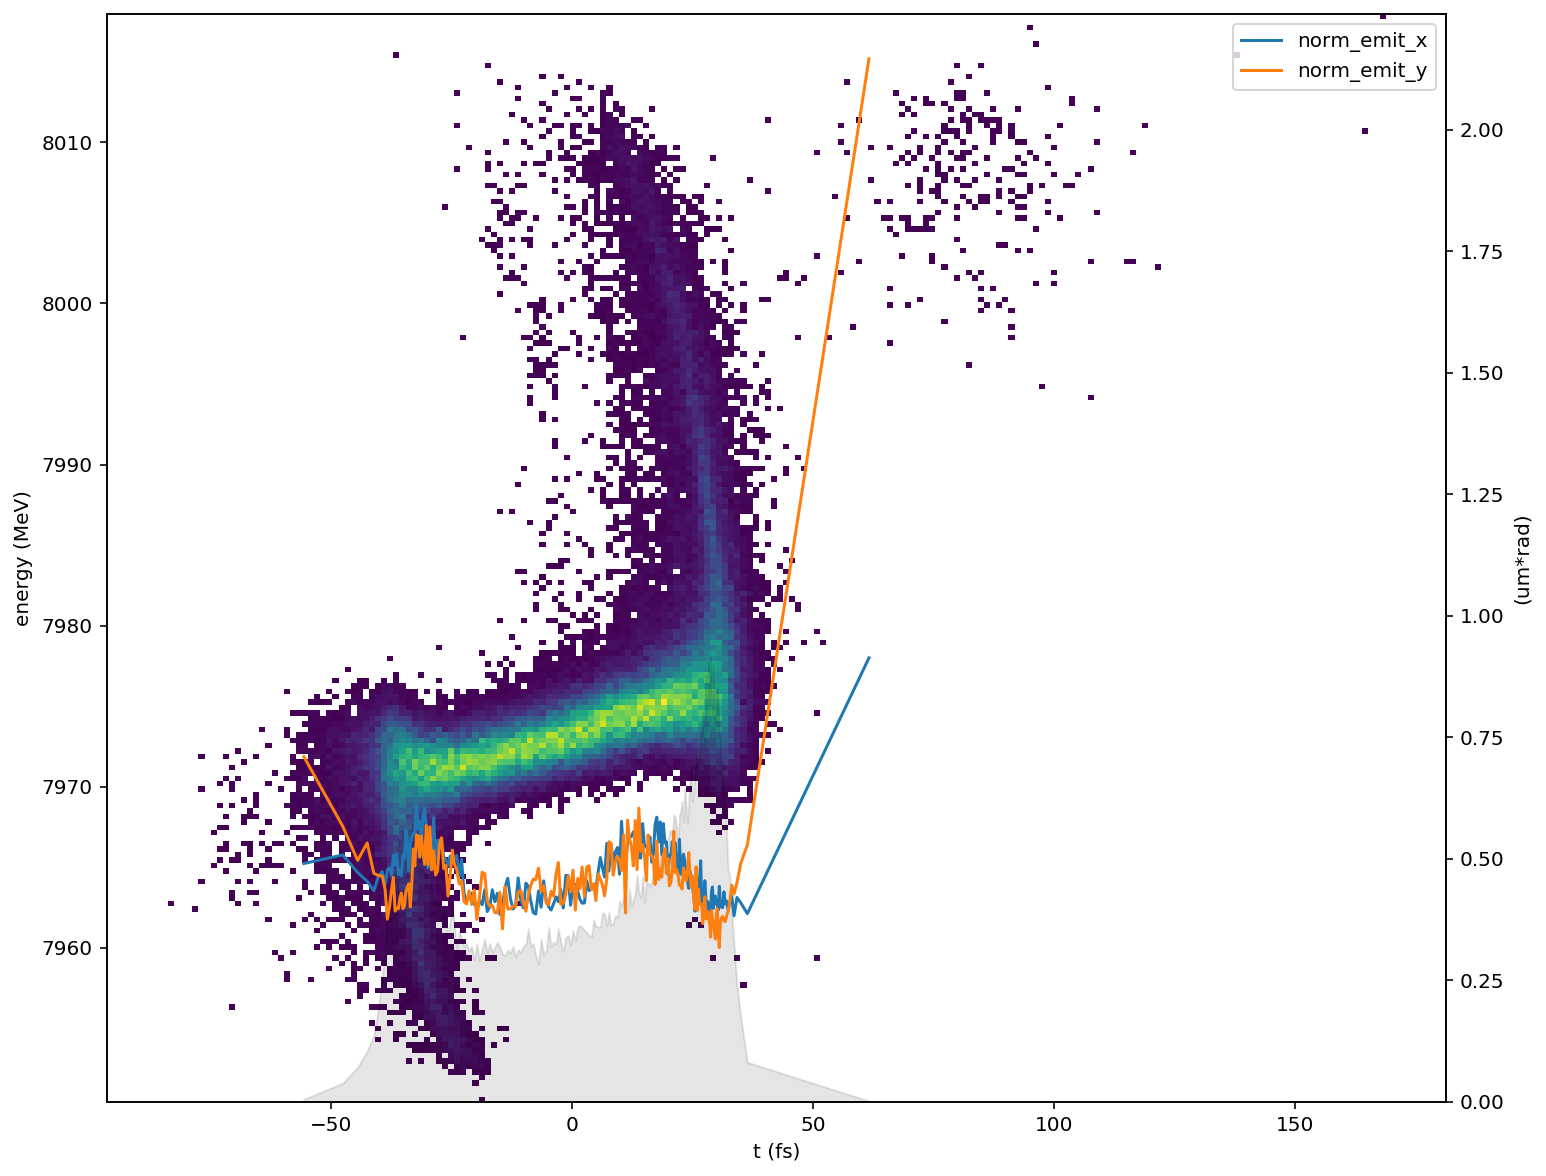

In [21]:
density_and_slice_plot(P, 't', 'energy', stat_keys = ['norm_emit_x', 'norm_emit_y'], n_slice = 200, bins=200)